<a href="https://colab.research.google.com/github/hublun/TWSApi/blob/master/TWS_BackTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
df = pd.read_pickle('/content/drive/MyDrive/TWS/Weekly5S/M2K20210103_to_20210108170000.pkl')

In [142]:
df["Time"] = pd.to_datetime(df["time"], format='%Y%m%d  %H:%M:%S', yearfirst=True)

In [143]:
df.drop('time', axis=1, inplace=True)

In [144]:
df["Hour"] = pd.DatetimeIndex(df["Time"]).hour
# # df["Minute"] = pd.DatetimeIndex(df["Time"]).minute
# df["Day"] = pd.DatetimeIndex(df["Time"]).day

In [145]:
initialDateTime = df.Time[0]
initialDateTime

Timestamp('2021-01-03 18:00:00')

In [146]:
df["TradeDay"] = pd.TimedeltaIndex(df.Time - initialDateTime).days

In [147]:
df["dev"] = df.close - df.open
df["jump"] = df.high - df.low 

In [148]:
df = df[df.jump.ne(0.0)]

In [149]:
df.TradeDay.unique()

array([0, 1, 2, 3, 4])

In [127]:
# df.drop(df[df.TradeDay==0].index, inplace=True)

In [150]:
df["stdv"] = df.dev.rolling(window=60, min_periods=1).std()
df["mu"] = df.dev.ne(0).rolling(window=60, min_periods=1).mean()
df["t"] = (df.dev - df.mu) / df.stdv
df["tul"] = df.t.rolling(window=60, min_periods=1).quantile(0.85)
df["tll"] = df.t.rolling(window=60, min_periods=1).quantile(0.15)

In [151]:
df['returns'] = np.log(df.avg/df.avg.shift(1))

In [152]:
df.TradeDay.unique()

array([0, 1, 2, 3, 4])

In [153]:
df.drop(df.head(10*12).index, inplace=True)
df.drop(df.tail(5*12).index, inplace=True)

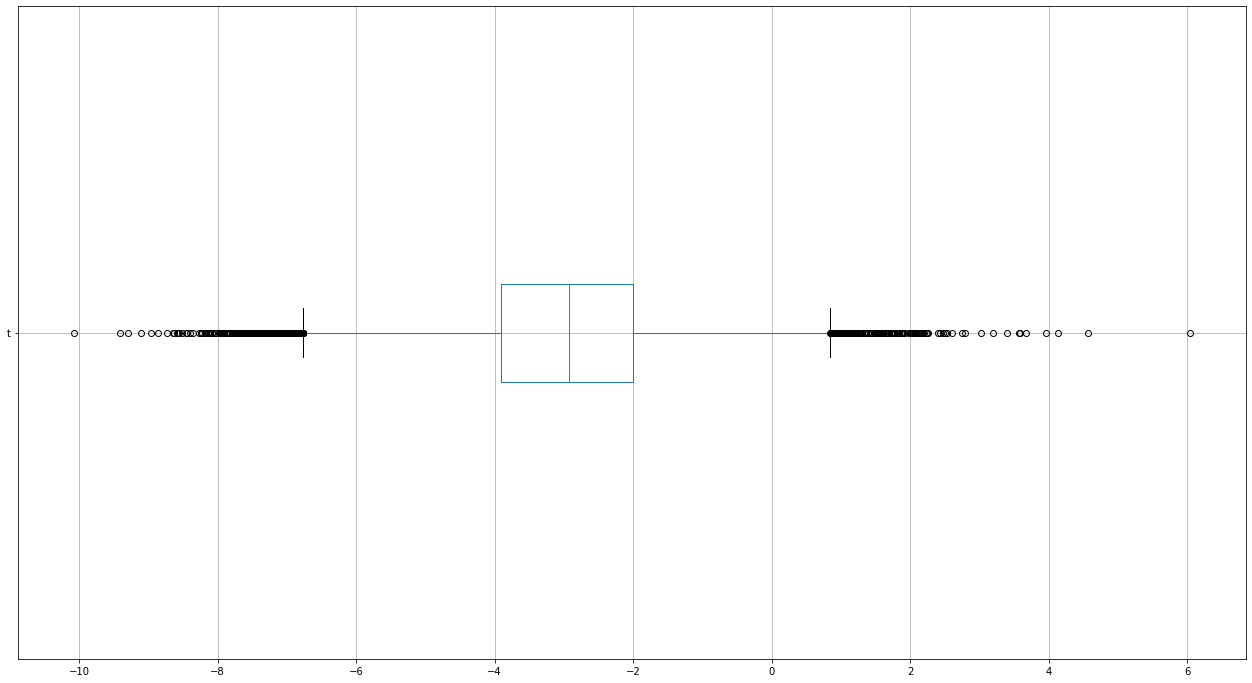

In [154]:
df.boxplot(column='t', vert=False, figsize=(22,12))

In [155]:
df.to_pickle("BackTestData.pkl")

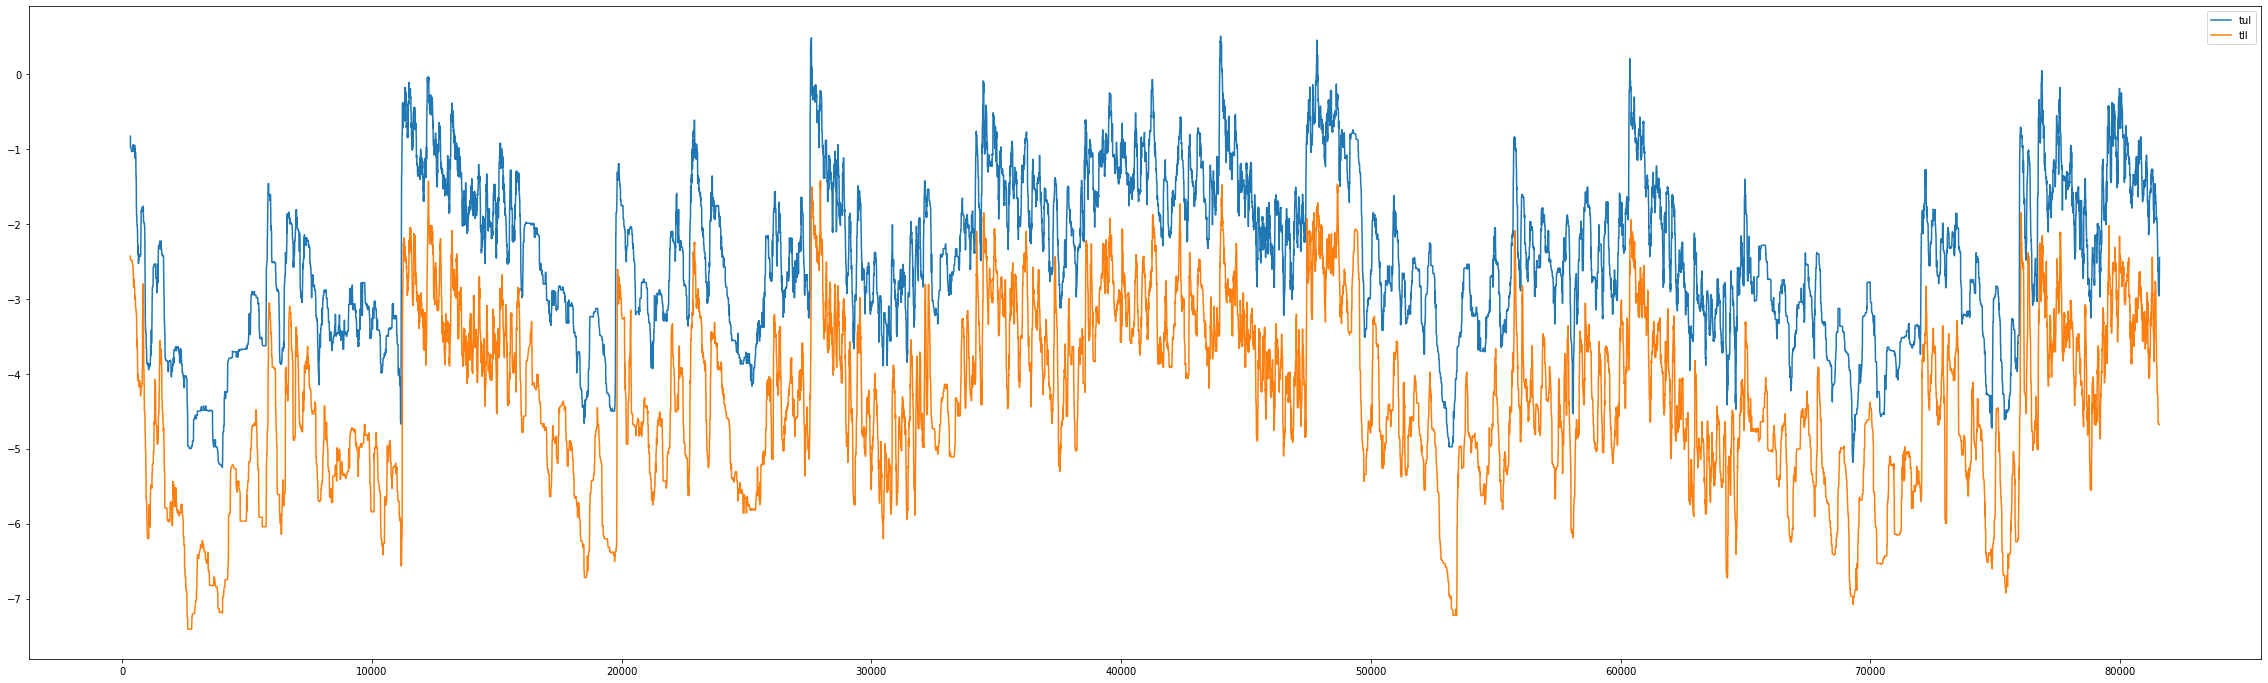

In [156]:
df[["tul", "tll"]].plot(figsize=(40,12))

In [185]:
tupp=df.t.quantile(q=0.65)
tlow = df.t.quantile(q=0.35)
tupp, tlow

(-2.3977578273677698, -3.478818890545357)

In [186]:
df["play"] = df.t.apply((lambda x: 1 if x > tupp else -1 if x< tlow else 0))

In [191]:
df["static_play"] = np.where(df.t < tlow, -1,(np.where(df.t>tupp, 1, 0)))

In [194]:
df["dynamic_play"]=np.where(df.t<df.tll,-1,(np.where(df.t>df.tul, 1, 0)))

In [195]:
df['game'] = df.play.shift(1)*df.returns
df['sgame'] = df.static_play.shift(1)*df.returns
df['dgame'] = df.dynamic_play.shift(1)*df.returns

In [196]:
df[['returns', "game",'sgame', 'dgame']].sum().apply(np.exp)

returns    1.053883
game       4.580381
sgame      4.580381
dgame      4.124942
dtype: float64

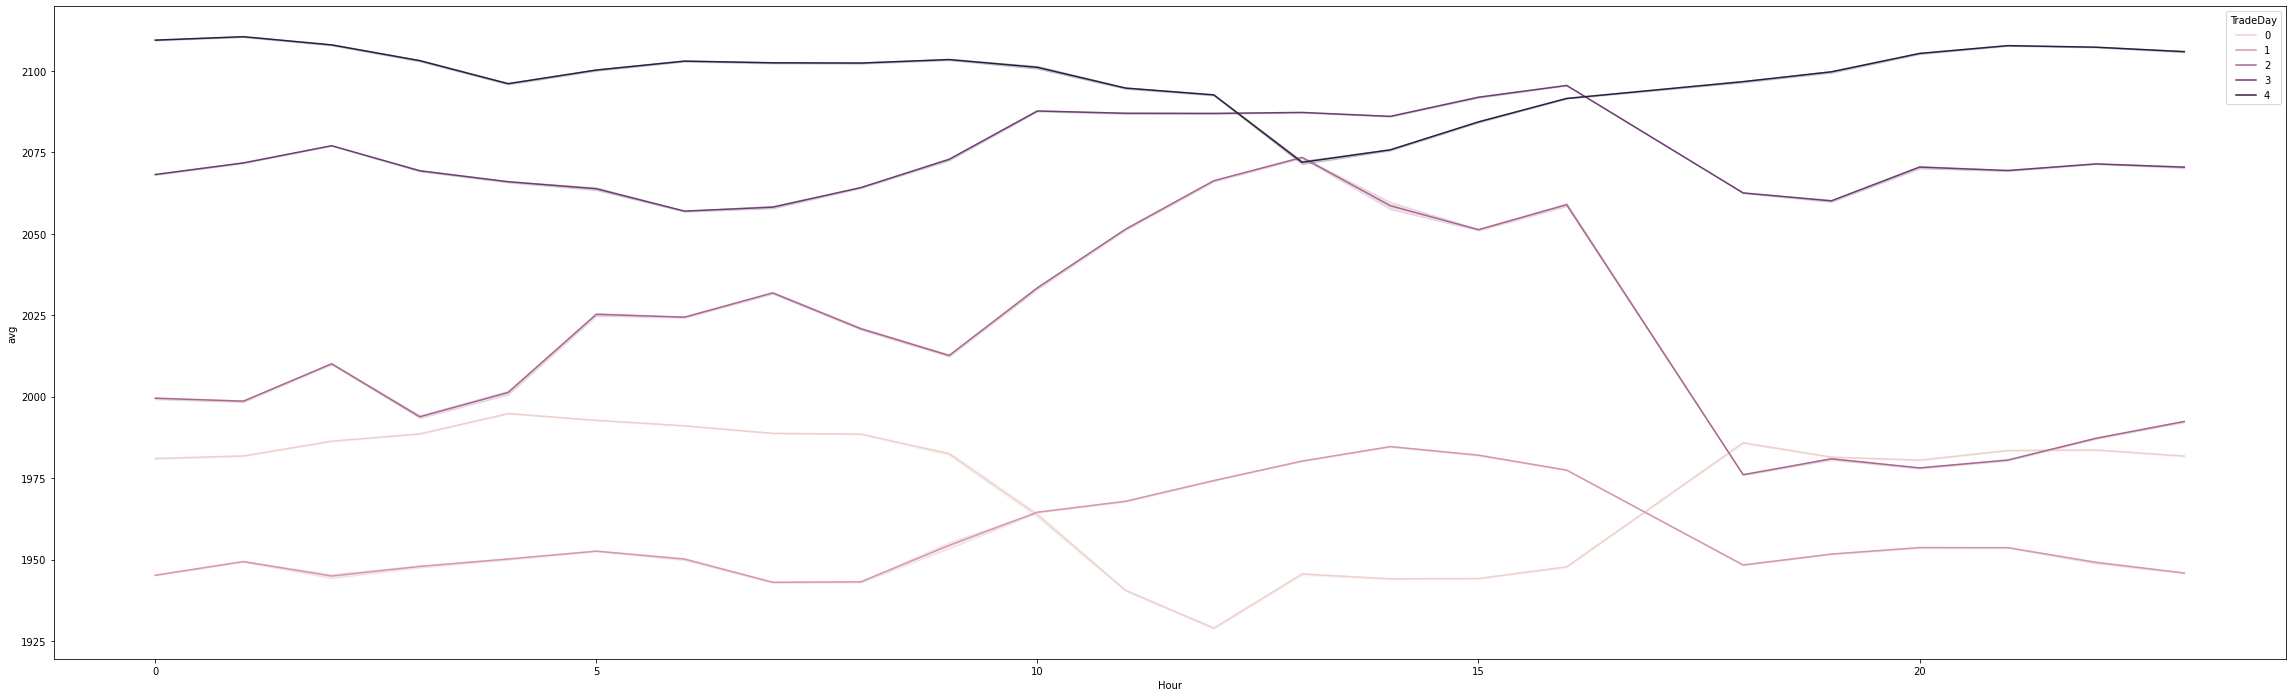

In [171]:
# df.avg.plot(figsize=(33,12), colormap="copper")
a4_dims = (40,12)
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=a4_dims)
sns.lineplot(data=df, x='Hour', y='avg', hue='TradeDay')

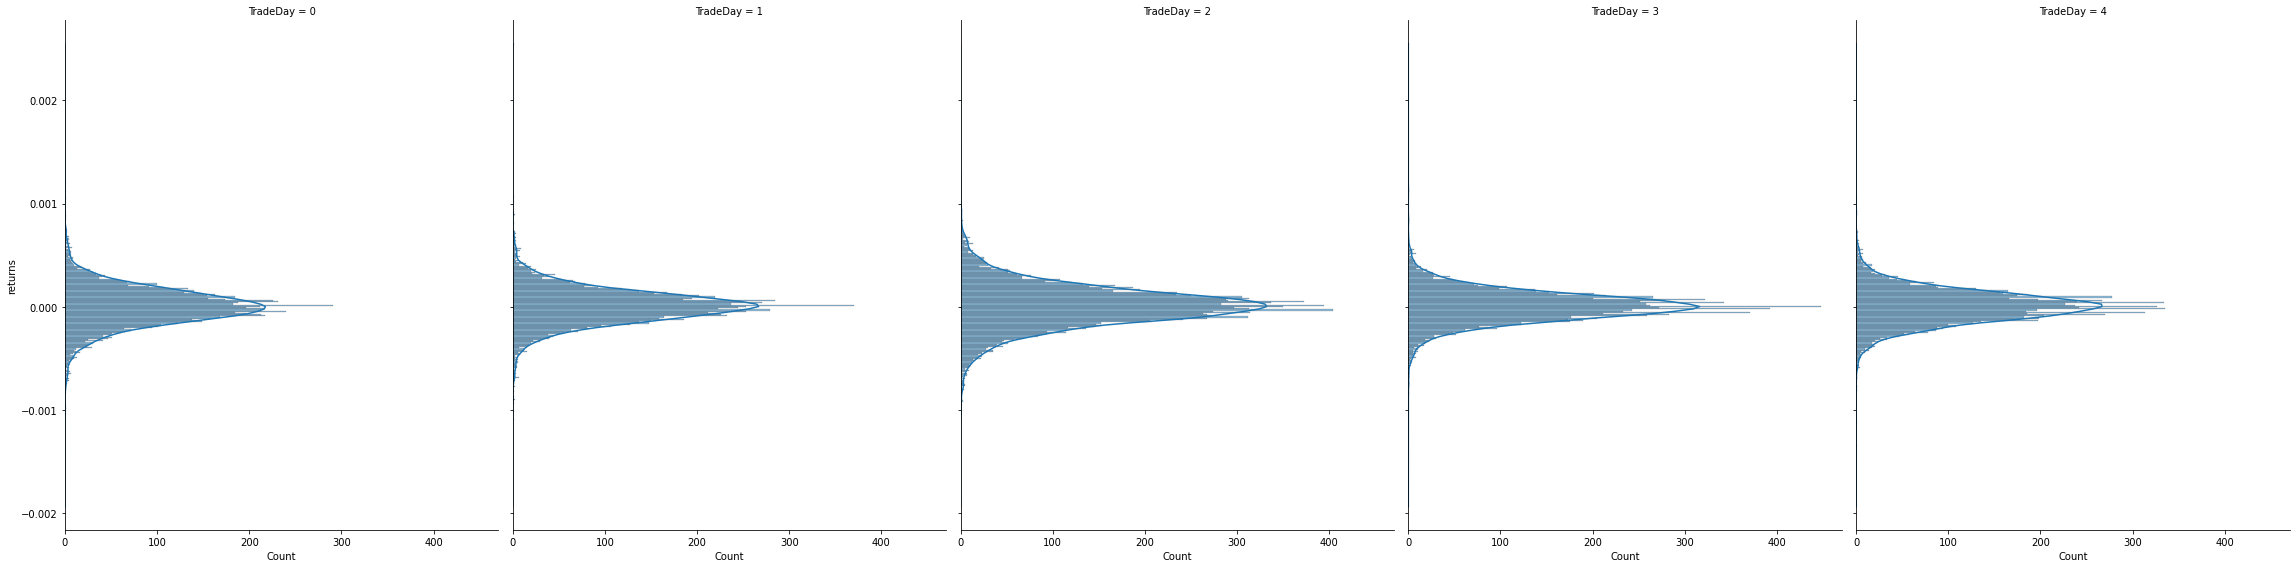

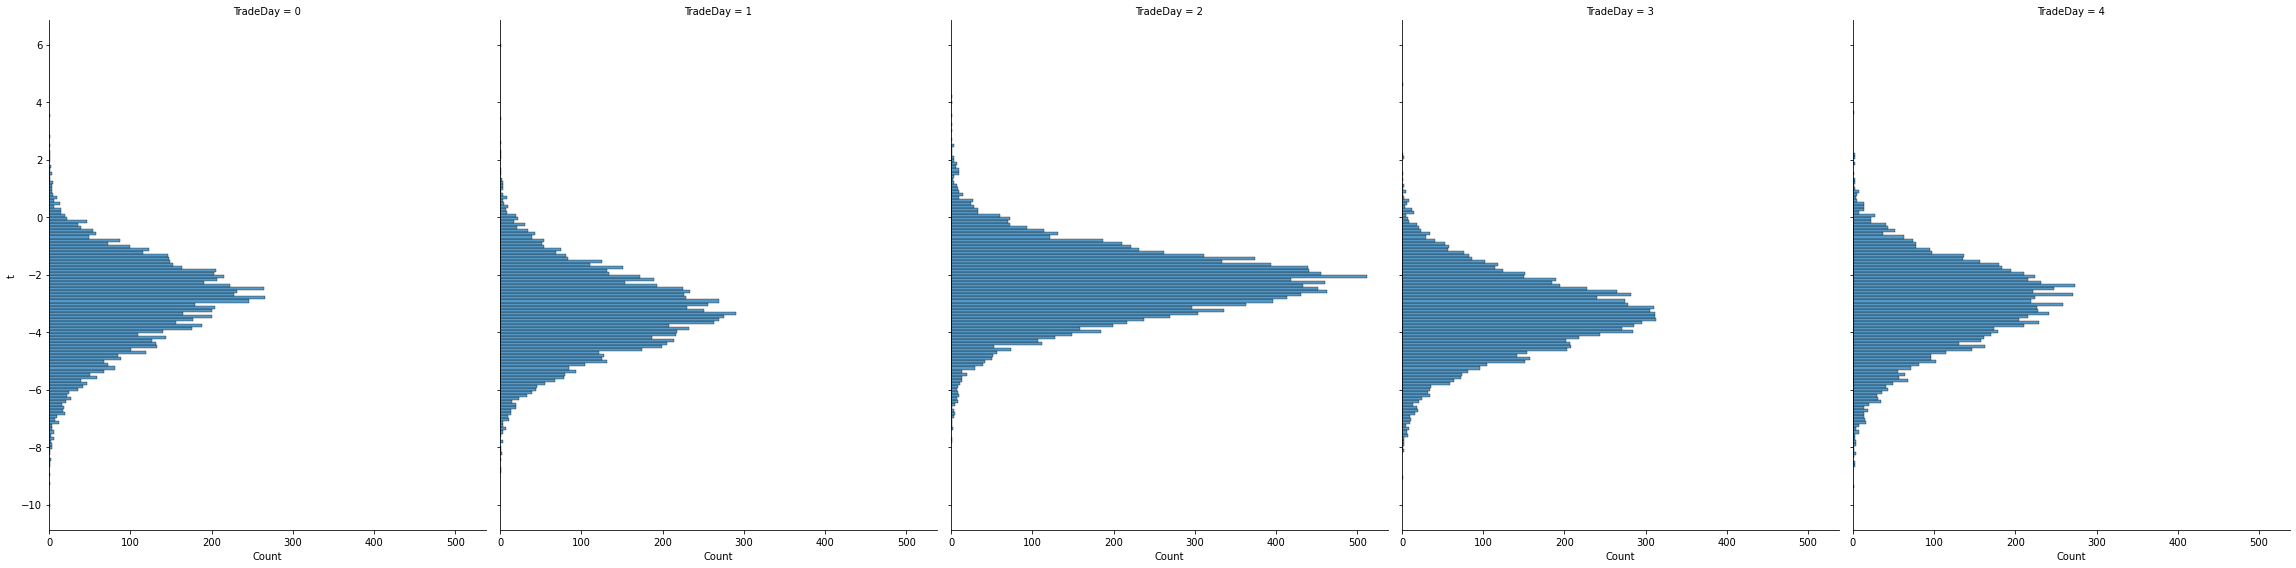

In [179]:
a4_dims = (40,20)
# fig, axes = plt.subplots(nrows=1,ncols=2,figsize=a4_dims)
sns.displot(data=df,y="returns" ,kde=True, col="TradeDay",height=8, aspect=0.8)
sns.displot(data=df,y="t" ,col="TradeDay",height=8, aspect=0.8)
plt.show()

In [ ]:
# a4_dims = (40,50)
# fig, axes = plt.subplots(nrows=4,ncols=1,figsize=a4_dims)
# df[(df.t <-2) & (df.TradeDay==0)].groupby(df.Hour)["returns"].mean().plot(kind="bar", ax=axes[0])
# df[(df.t <-2) & (df.TradeDay==1)].groupby(df.Hour)["returns"].mean().plot(kind="bar", ax=axes[1], color="#123456")
# df[(df.t <-2) & (df.TradeDay==2)].groupby(df.Hour)["returns"].mean().plot(kind="bar", ax=axes[2], color="#ac3489")
# df[(df.t <-2) & (df.TradeDay==3)].groupby(df.Hour)["returns"].mean().plot(kind="bar", ax=axes[3], color="#123456")
# df[(df.t <-2) & (df.TradeDay==4)].groupby(df.Hour)["returns"].mean().plot(kind="bar", ax=axes[3], color="#123456")

In [ ]:
# data=df[df.Hour==15]
# sns.set_style("darkgrid")
# fig, ax = plt.subplots(figsize=a4_dims)
# sns.lineplot(x=data.Minute, y=data.t, hue=data.TradeDay, palette="cool", dashes=False, alpha=0.9)

In [ ]:
# for index, row in df.iterrows():
#   if row["t_val24"] > 2:
#     print(row["avg"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fab2870a080>,
      dtype=object)

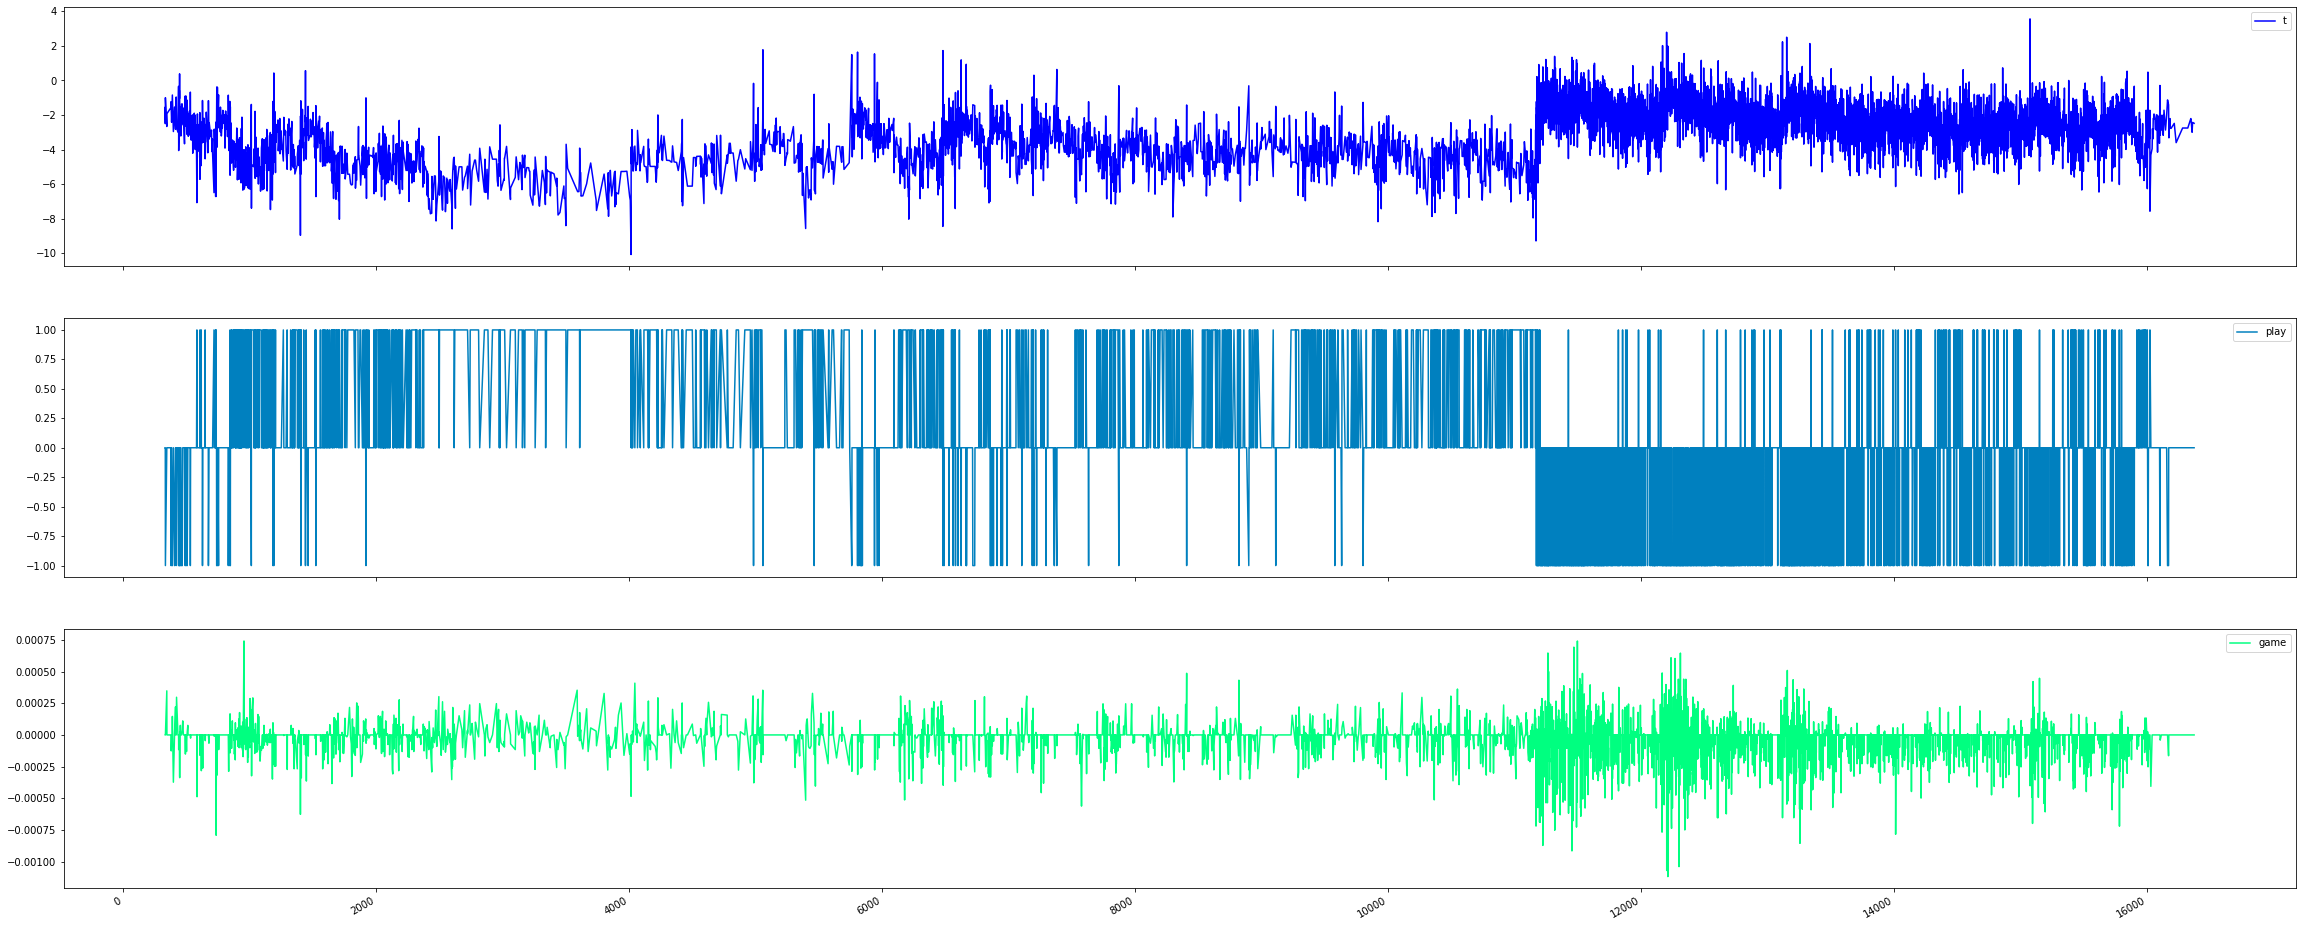

In [174]:
df[(df.TradeDay==0)][['t','play', 'game']].plot(kind='line', subplots=True, use_index=True,figsize=(40,18), colormap='winter')

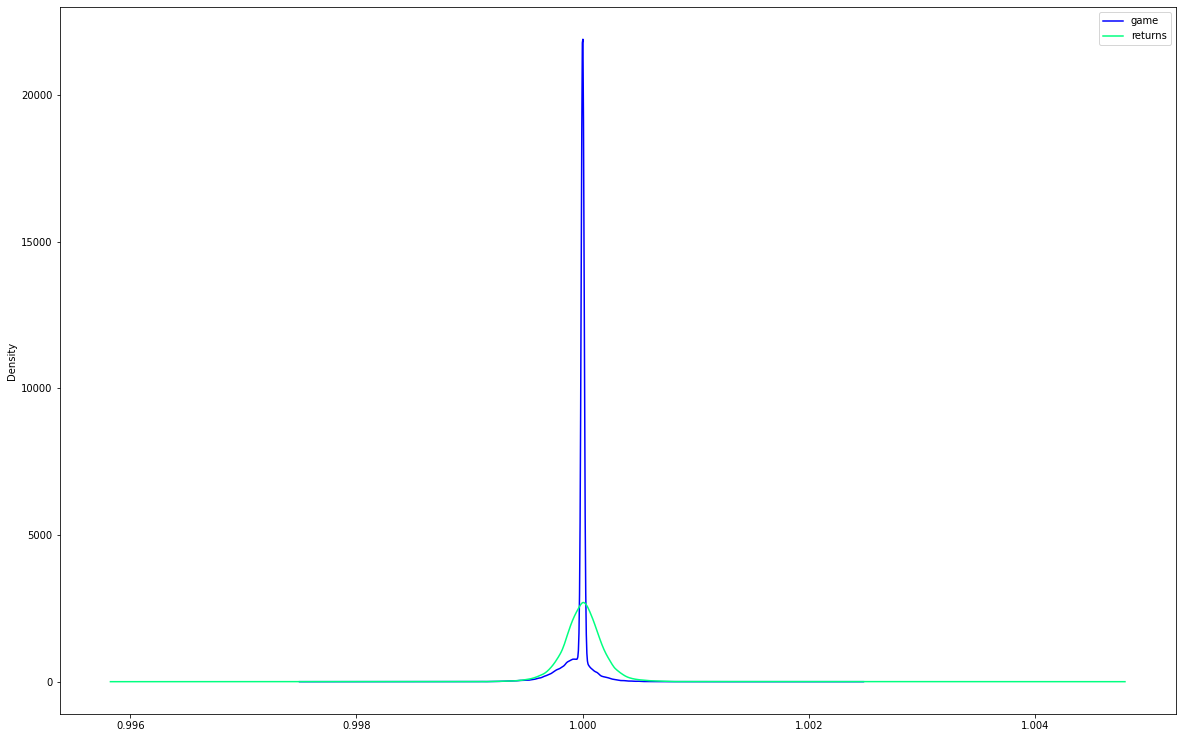

In [175]:
df[['game', 'returns']].apply(np.exp).plot(kind='kde', subplots=False, use_index=True,figsize=(20,13), colormap='winter')

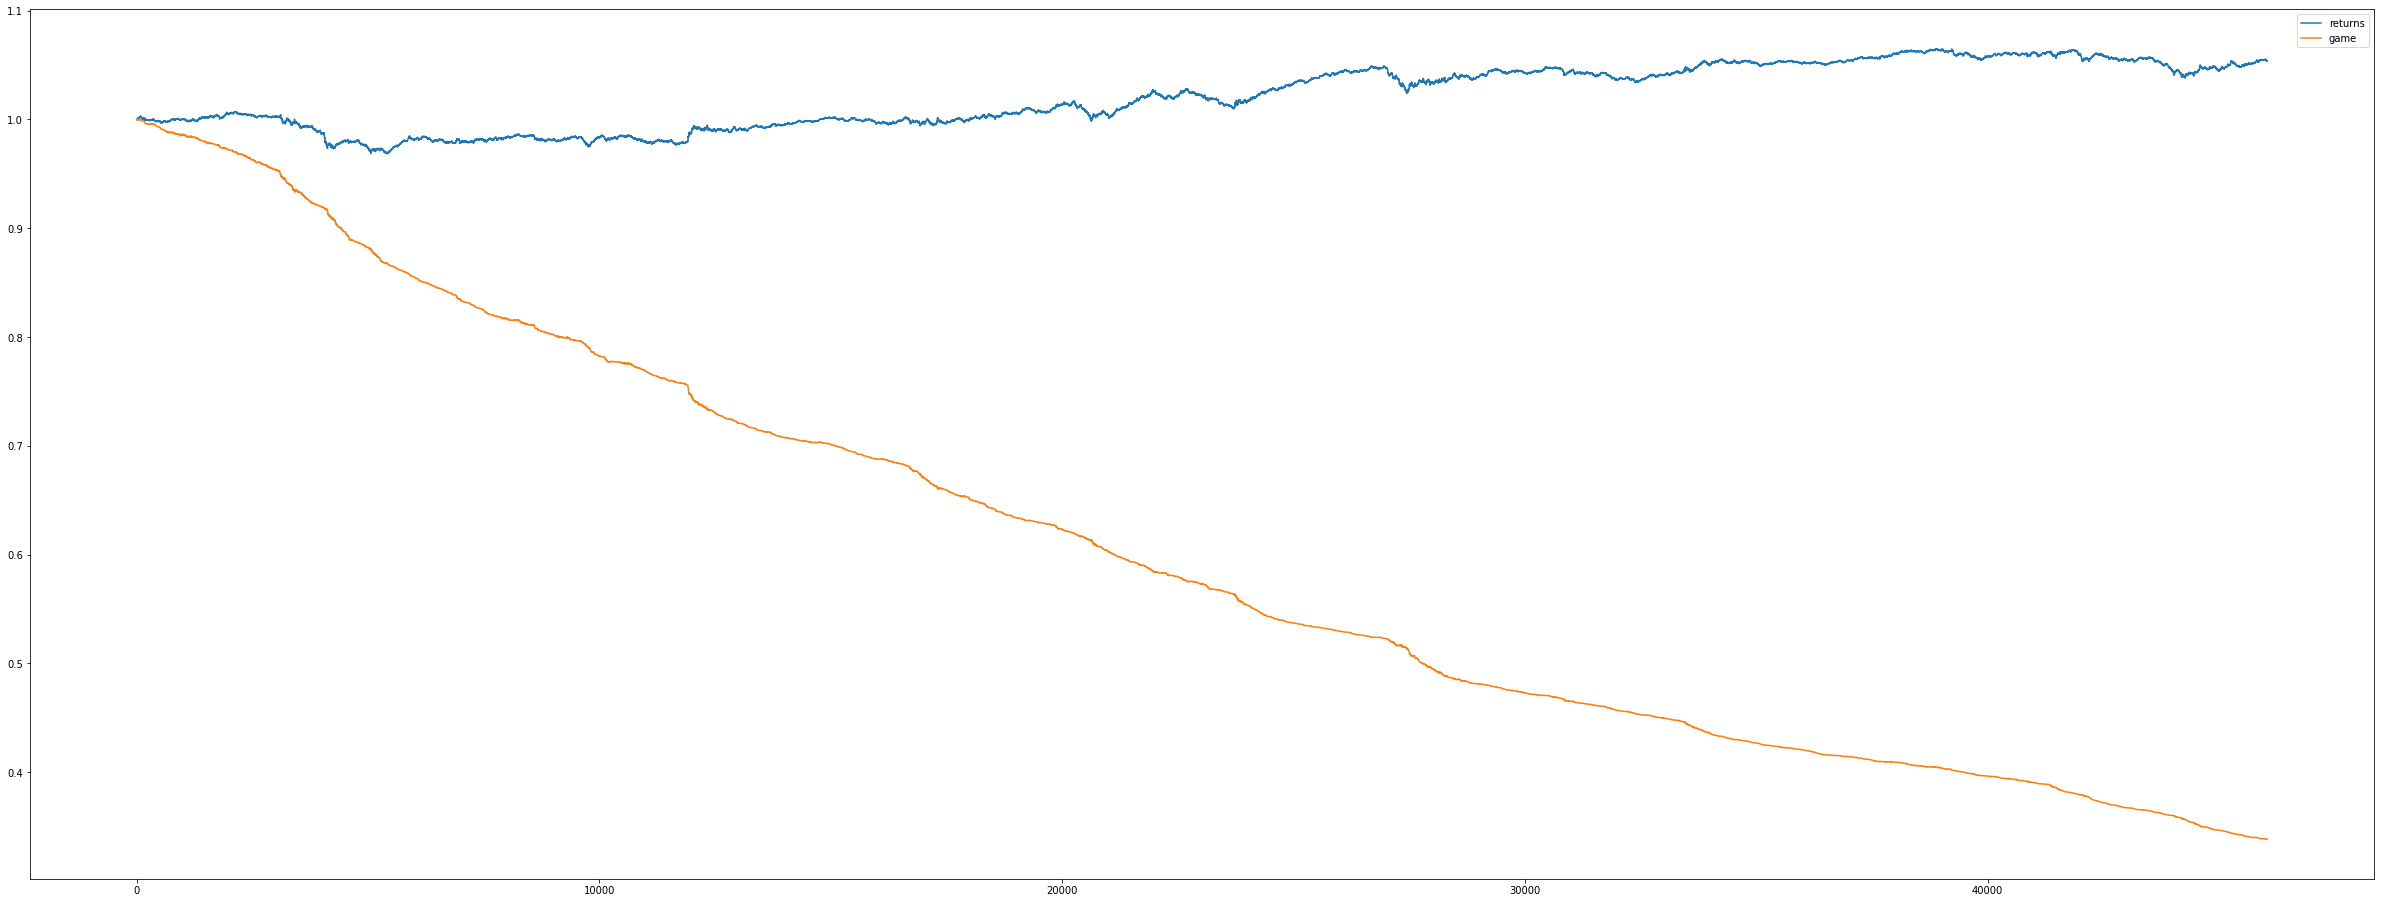

In [176]:
df[['returns','game']].cumsum().apply(np.exp).plot(figsize=(42,16), use_index=False)

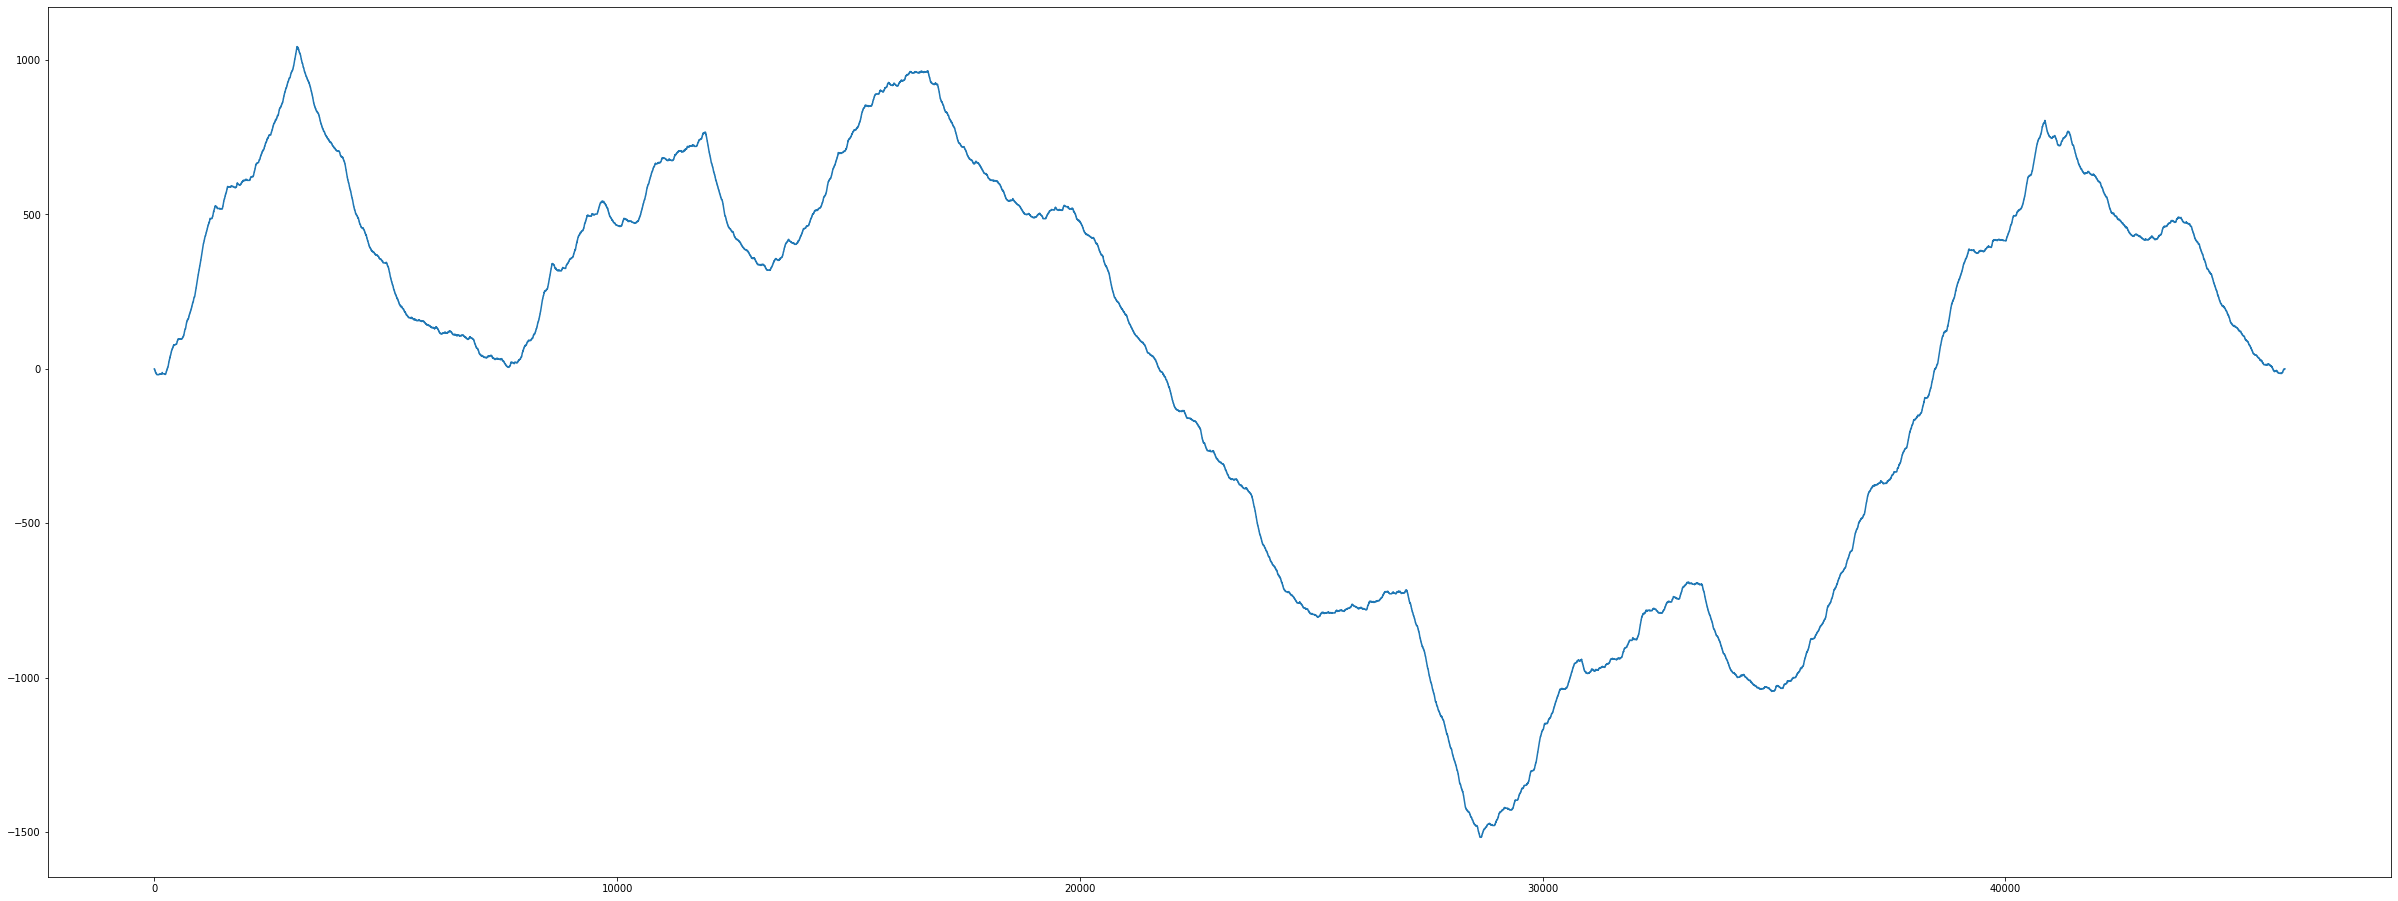

In [178]:
df.play.cumsum().plot(figsize=(42,16), use_index=False)